# 1.DATA SCRAPING

## Imports

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## HTTP Request

#### store website in a variable

In [2]:
website = "https://www.ambitionbox.com/list-of-companies"

#### Get Request

In [3]:
response = requests.get(website)

#### Status Code

In [4]:
response.status_code

200

#### Soup Object

In [5]:
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
soup

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>List of companies - 577.3k companies | AmbitionBox</title><meta content="2021 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/><meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/><meta content="#ffffff" data-n-head="ssr" name="theme-color"/><meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/><meta content="default" data-n-head="ssr" name="apple-

#### Results

In [48]:
company=soup.find_all('div',class_='company-content-wrapper')
print(len(company)) 

30


In [49]:
company

[<div class="company-content-wrapper"><div class="company-content"><div class="company-logo"><img alt="ICA Edu Skills logo" class="lazy" data-src="https://static.ambitionbox.com/alpha/company/photos/logos/ica-edu-skills.jpg" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/static/icons/company-placeholder.svg"/></div> <div class="company-info-wrapper"><div class="company-info"><div class="left"><a href="/overview/ica-edu-skills-overview"><h2 class="company-name bold-title-l" title="ICA Edu Skills">
 								ICA Edu Skills
 							</h2></a> <div class="rating-wrapper"><p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 								3.7
 							</p> <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/ica-edu-skills-reviews">
 								(376 Reviews)
 							</a></div></div> <button class="ab_btn follow-btn invert round"><span class="ctas-btn-medium">Follow</span></button></div> <!-- -

### Target necessary data

1. Name
2. Ratings
3. Reviews
4. Company Type
5. Headquarters
6. How old
7. Employees

#### Name

In [47]:
company[0].find("h2",class_="company-name bold-title-l").get_text().strip()

'ICA Edu Skills'

#### Ratings

In [46]:
company[0].find("p",{"class":"rating badge-large rating-35"}).get_text().strip()

'3.7'

#### Reviews

In [45]:
company[0].find("a",{"class":"review-count sbold-Labels"}).get_text().strip()

'(376 Reviews)'

#### Company Type

In [42]:
company[0].find("p",{"class":"infoEntity sbold-list-header"}).get_text().strip()

'Private'

#### Headquarters

In [41]:
company[0].find_all('p',class_='infoEntity')[1].text.strip()

'Kolkata,West Bengal + 81 more'

#### How old

In [40]:
company[0].find_all('p',class_='infoEntity')[2].text.strip()

'22 years old'

#### Employees

In [50]:
company[0].find_all('p',class_='infoEntity')[3].text.strip()

'1k-5k employees (Global)'

## Combining through for loop and creating a Dataframe

In [20]:
name = []
rating = []
reviews = []
comp_type = []
head_q = []
how_old = []
no_of_employees = []
for comp in company:
    name.append(comp.find('h2').text.strip())
    rating.append(comp.find('p', class_ = "rating").text.strip())
    reviews.append(comp.find('a', class_ = "review-count").text.strip())
    comp_type.append(comp.find_all('p', class_ = 'infoEntity')[0].text.strip())
    head_q.append(comp.find_all('p',class_='infoEntity')[1].text.strip())
    how_old.append(comp.find_all('p',class_='infoEntity')[2].text.strip())
    no_of_employees.append(comp.find_all('p',class_='infoEntity')[3].text.strip())
#creating dataframe for all list
features = {'name':name, 'rating':rating,'reviews':reviews,
            'company_type':comp_type,'Head_Quarters':head_q, 'Company_Age':how_old,
            'No_of_Employee':no_of_employees }
df = pd.DataFrame(features)

In [27]:
df

,name,rating,reviews,company_type,Head_Quarters,Company_Age,No_of_Employee
0,ICA Edu Skills,3.7,(376 Reviews),Private,"Kolkata,West Bengal + 81 more",22 years old,1k-5k employees (Global)
1,Steag Energy Servi...,4.3,(374 Reviews),Private,"Essen,Essen + 25 more",21 years old,1k-5k employees (India)
2,nThrive Global Sol...,3.8,(374 Reviews),Private,Alpharetta + 6 more,18 years old,501-1k employees (India)
3,RBL FinServe,4.2,(374 Reviews),"Mumbai,Maharashtra + 132 more",16 years old,NaN,NaN
4,Teva Pharmaceutica...,4.2,(374 Reviews),Private,"Dublin,Dublin + 25 more",42 years old,1k-5k employees (India)
5,Technosoft Corpora...,3.1,(373 Reviews),Private,"Southfield,Michigan + 14 more",41 years old,51-200 employees (India)
6,Alstom Transportat...,4.0,(373 Reviews),Private,Saint-Ouen + 24 more,93 years old,10k-50k employees (India)
7,Sonata Software,3.8,(372 Reviews),Public,"Bangalore/Bengaluru,Karnataka + 7 more",35 years old,1k-5k employees (Global)
8,Madras Cements,4.3,(372 Reviews),Public,"Chennai,Tamil Nadu + 58 more",60 years old,10k-50k employees (Global)
9,Godrej Agrovet,4.1,(372 Reviews),Mumbai + 65 more,1k-5k employees (India),NaN,NaN


In [24]:
final = pd.DataFrame()
for j in range(1, 33):
    webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(j)).text
    soup = BeautifulSoup(webpage, 'lxml')
    company = soup.find_all('div', class_ = 'company-content-wrapper')
    name = []
    rating = []
    reviews = []
    comp_type = []
    head_q = []
    how_old = []
    no_of_employees = []
    for comp in company:
        try:
            name.append(comp.find('h2').text.strip())
        except:
            name.append(np.nan)
        try:
            rating.append(comp.find('p', class_ = "rating").text.strip())
        except:
            rating.append(np.nan)
        try:   
            reviews.append(comp.find('a', class_ = "review-count").text.strip())
        except:
            reviews.append(np.nan)
        try:
            comp_type.append(comp.find_all('p', class_ = 'infoEntity')[0].text.strip())
        except:
            comp_type.append(np.nan)
        try:  
            head_q.append(comp.find_all('p',class_='infoEntity')[1].text.strip())
        except:
            head_q.append(np.nan)
        try:
            how_old.append(comp.find_all('p',class_='infoEntity')[2].text.strip())
        except:
            how_old.append(np.nan)
        try:
            no_of_employees.append(comp.find_all('p',class_='infoEntity')[3].text.strip())
        except:
            no_of_employees.append(np.nan)
    #creating dataframe for all list
    features = {'name':name, 'rating':rating,'reviews':reviews,
              'company_type':comp_type,'Head_Quarters':head_q, 'Company_Age':how_old,
              'No_of_Employee':no_of_employees }
    df = pd.DataFrame(features)
    final = final.append(df, ignore_index=True)

# Data Cleaning

In [75]:
import re
final['Company_Age'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [147]:
final['reviews'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [148]:
final

,name,rating,reviews,company_type,Head_Quarters,Company_Age,No_of_Employee
0,TCS,3.9,261,Public,"Mumbai,Maharashtra + 202 more",53,1 Lakh+ employees (India)
1,Accenture,4.0,204,Public,"Dublin,Dublin + 119 more",32,1 Lakh+ employees (India)
2,Cognizant,3.9,186,Private,"Teaneck,New Jersey + 66 more",27,1 Lakh+ employees (India)
3,ICICI Bank,4.0,184,Public,"Mumbai,Maharashtra + 896 more",27,50k-1 Lakh employees (India)
4,HDFC Bank,4.0,161,Public,"Mumbai,Maharashtra + 954 more",27,1 Lakh+ employees (India)
...,...,...,...,...,...,...,...
953,Ihg Group,4.2,366,Private,"Gurgaon/Gurugram,Haryana + 32 more",18,501-1k employees (India)
954,Saudi Binladin Gro...,4.4,365,Private,"Jeddah,Riyadh + 25 more",90,201-500 employees (India)
955,Jaya Hind Industri...,3.7,364,Public,"Pune,Maharashtra + 13 more",74,201-500 employees (Global)
956,Apollo Pharmacy,3.7,364,Private,"Chennai,Tamil Nadu + 70 more",38,10k-50k employees (Global)


In [149]:
final.isna().sum()

name              0
rating            0
reviews           0
company_type      0
Head_Quarters     0
Company_Age       0
No_of_Employee    0
dtype: int64

In [150]:
final.dropna(axis="index",how="any",inplace=True)

In [151]:
final.isna().sum()

name              0
rating            0
reviews           0
company_type      0
Head_Quarters     0
Company_Age       0
No_of_Employee    0
dtype: int64

In [152]:
final.shape

(894, 7)

# Data Visualisation

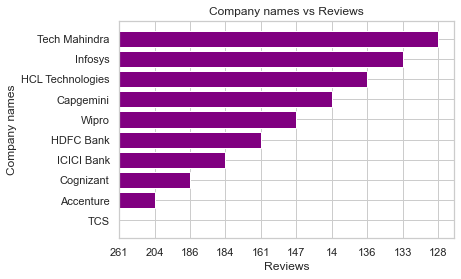

In [189]:
plt.barh(final['name'].head(10),final['reviews'].head(10),color='purple')
plt.title('Company names vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Company names')
plt.show()

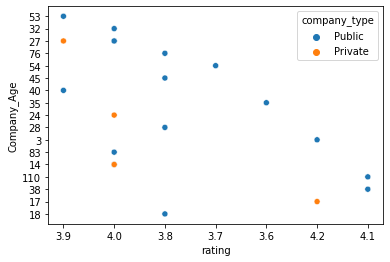

In [144]:
import seaborn as sns
sns.scatterplot(x="rating",y="Company_Age",hue="company_type",data=final.head(20))
plt.show()

C:\Users\RAJALAKSHMI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


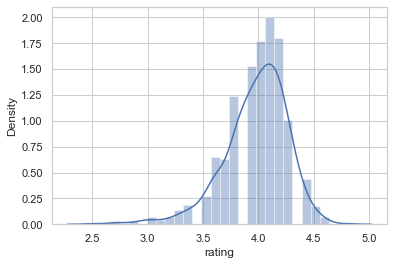

In [164]:
sns.distplot(final['rating'])
plt.show()

In [209]:
print(final.dtypes)

name              object
rating            object
reviews           object
company_type      object
Head_Quarters     object
Company_Age       object
No_of_Employee    object
dtype: object


In [220]:
final['reviews'] = final['reviews'].astype(float, errors = 'raise')

In [221]:
final['rating'] = final['rating'].astype(float, errors = 'raise')

In [233]:
final['Company_Age'] = final['Company_Age'].astype(float, errors = 'raise')

In [234]:
d =final[['reviews' ,'rating','Company_Age']]

In [235]:
cor = d.corr()

<AxesSubplot:>

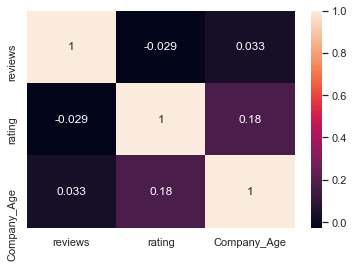

In [236]:
sns.heatmap(cor,annot=True)